Begin to analyze combined dataframe

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#supress scientific notation (show full number)
pd.options.display.float_format = '{:.0f}'.format

In [20]:
mlb_dataset = pd.read_csv(r'cleansed_data\atten_wins_payroll.csv')

mlb_dataset.head()

,Year,Team,Games Played,Total Payroll,Wins,Attendance,Avg Att
0,2023,Arizona Diamondbacks,162,112763571,84,1961182,24212
1,2022,Arizona Diamondbacks,162,75993333,74,1605199,19817
2,2021,Arizona Diamondbacks,162,89077233,52,1043010,12876
3,2023,Atlanta Braves,162,199727500,104,3191505,39401
4,2022,Atlanta Braves,162,173935000,101,3129931,38641


Using the existing data to create new columns for analysis

In [21]:
#create cost per win column
mlb_dataset['Cost Per Win'] = mlb_dataset['Total Payroll'] / mlb_dataset['Wins'].astype(int)
#create cost per fan column
mlb_dataset['Cost Per Fan'] = mlb_dataset['Total Payroll'] / mlb_dataset['Attendance'].astype(int)

mlb_dataset.head()

,Year,Team,Games Played,Total Payroll,Wins,Attendance,Avg Att,Cost Per Win,Cost Per Fan
0,2023,Arizona Diamondbacks,162,112763571,84,1961182,24212,1342423,57
1,2022,Arizona Diamondbacks,162,75993333,74,1605199,19817,1026937,47
2,2021,Arizona Diamondbacks,162,89077233,52,1043010,12876,1713024,85
3,2023,Atlanta Braves,162,199727500,104,3191505,39401,1920457,63
4,2022,Atlanta Braves,162,173935000,101,3129931,38641,1722129,56


In [22]:
#sort teams by total payroll by year
mlb_dataset.sort_values(by='Total Payroll', ascending=False, inplace=True)
mlb_dataset.reset_index(drop=True, inplace=True)

mlb_dataset

,Year,Team,Games Played,Total Payroll,Wins,Attendance,Avg Att,Cost Per Win,Cost Per Fan
0,2023,New York Mets,162,334233332,75,2573555,32994,4456444,130
1,2022,Los Angeles Dodgers,162,277108333,111,3861408,47671,2496471,72
2,2023,New York Yankees,162,268954047,82,3269016,40862,3279927,82
3,2022,New York Mets,162,253119999,101,2564737,33308,2506139,99
4,2022,New York Yankees,162,240290714,99,3136207,40207,2427179,77
...,...,...,...,...,...,...,...,...,...
85,2022,Cleveland Guardians,162,42310000,92,1295869,17050,459891,33
86,2022,Pittsburgh Pirates,162,37875000,62,1257458,15524,610887,30
87,2021,Pittsburgh Pirates,162,35905000,61,859498,10611,588607,42
88,2022,Oakland Athletics,162,32548334,60,787902,9973,542472,41


Create new data frames with specified data to plot 
First, going to find the top 20 teams based on how much each win cost. The teams with the 20 lowest cost per win seasons will be identified.

In [23]:
#Top 20 cost effective seasons 
cost_efficient_t20 = mlb_dataset.nsmallest(20, 'Cost Per Win')
cost_efficient_t20['Team Season'] = cost_efficient_t20['Year'].astype(str) + ' ' + cost_efficient_t20['Team'].astype(str)
wins = cost_efficient_t20['Wins']
cost = cost_efficient_t20['Cost Per Win']

cost_efficient_t20

,Year,Team,Games Played,Total Payroll,Wins,Attendance,Avg Att,Cost Per Win,Cost Per Fan,Team Season
89,2022,Baltimore Orioles,162,30221166,83,1368367,17543,364110,22,2022 Baltimore Orioles
85,2022,Cleveland Guardians,162,42310000,92,1295869,17050,459891,33,2022 Cleveland Guardians
88,2022,Oakland Athletics,162,32548334,60,787902,9973,542472,41,2022 Oakland Athletics
82,2021,Cleveland Guardians,162,46833300,80,1114368,14472,585416,42,2021 Cleveland Guardians
87,2021,Pittsburgh Pirates,162,35905000,61,859498,10611,588607,42,2021 Pittsburgh Pirates
80,2021,Tampa Bay Rays,162,60388600,100,761072,9513,603886,79,2021 Tampa Bay Rays
86,2022,Pittsburgh Pirates,162,37875000,62,1257458,15524,610887,30,2022 Pittsburgh Pirates
76,2023,Baltimore Orioles,162,64907966,101,1936798,23911,642653,34,2023 Baltimore Orioles
77,2023,Tampa Bay Rays,162,64652911,99,1440301,17781,653060,45,2023 Tampa Bay Rays
78,2021,Seattle Mariners,162,64553500,90,1215985,15012,717261,53,2021 Seattle Mariners


Next, find teams that had successful seasons while also being cost effective.
For this exercise a successfu season is defined as a winning record (more than 81 wins).

In [24]:
#what percent of efficient teams have winning seasons? (>81 wins)
cost_win_eff = cost_efficient_t20.loc[cost_efficient_t20['Wins'] > 81]

cost_win_eff

,Year,Team,Games Played,Total Payroll,Wins,Attendance,Avg Att,Cost Per Win,Cost Per Fan,Team Season
89,2022,Baltimore Orioles,162,30221166,83,1368367,17543,364110,22,2022 Baltimore Orioles
85,2022,Cleveland Guardians,162,42310000,92,1295869,17050,459891,33,2022 Cleveland Guardians
80,2021,Tampa Bay Rays,162,60388600,100,761072,9513,603886,79,2021 Tampa Bay Rays
76,2023,Baltimore Orioles,162,64907966,101,1936798,23911,642653,34,2023 Baltimore Orioles
77,2023,Tampa Bay Rays,162,64652911,99,1440301,17781,653060,45,2023 Tampa Bay Rays
78,2021,Seattle Mariners,162,64553500,90,1215985,15012,717261,53,2021 Seattle Mariners
73,2021,Oakland Athletics,162,74615000,86,701430,8767,867616,106,2021 Oakland Athletics
71,2022,Tampa Bay Rays,162,75347813,86,1128127,13927,876137,67,2022 Tampa Bay Rays
63,2021,Milwaukee Brewers,162,87569366,95,1824282,22522,921783,48,2021 Milwaukee Brewers
66,2023,Miami Marlins,162,81075000,84,1162819,14355,965179,70,2023 Miami Marlins


Now we will create a pivot table to include these successful and cost effective teams and see who has had the best individual seasons from 2021-2023.

In [25]:
pivot_cost_win_eff = np.round(pd.pivot_table(cost_win_eff, values='Wins', 
                              index='Team', 
                              columns='Year'))
pivot_cost_win_eff.head(20)

Year,2021,2022,2023
Team,,,
Baltimore Orioles,NaN,83,101
Cleveland Guardians,NaN,92,NaN
Miami Marlins,NaN,NaN,84
Milwaukee Brewers,95,NaN,NaN
Oakland Athletics,86,NaN,NaN
Seattle Mariners,90,NaN,NaN
Tampa Bay Rays,100,86,99


--Clean up graph--
Finally, plot out that pivot table. 
The Tampa Bay Rays have had 3 seasons of cheap success, followed by 2 from the Baltmore Oioles.

<Axes: xlabel='Team'>

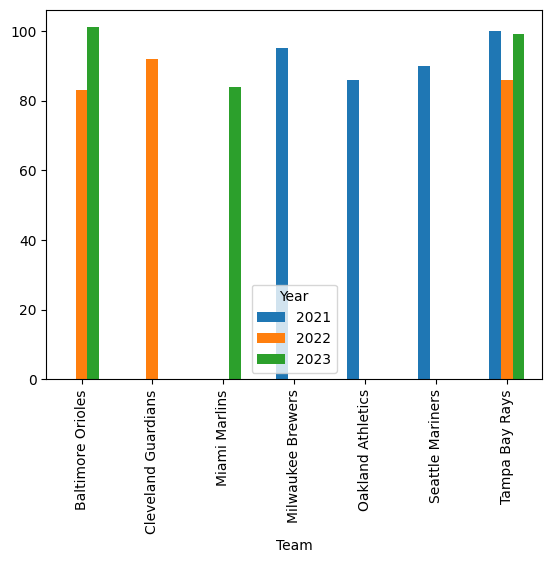

In [26]:
pivot_cost_win_eff.plot(kind='bar')

--One that inclludes attendance-- 

--Deeper dive in Reds-- 